# 딥러닝 라이브러리들
### 1. 텐서플로우(google) - 산업용
- 이미지 관련 라이브러리    
- keras를 이용하니 코딩이 쉬움
- 순차적 함수적 클래스
- wsl에서만 가능
<br>
### 2. 파이토치(meta꺼) - 연구용
- 자연어 관련 라이브러리 - 자연어할때 편함
- 윈도우에서도 가능
- 허깅페이스, 랭체인
- 클래스 (상속의 중요성)
<br> **설치방법**<br>
[pytorch 공홈](https://pytorch.org/get-started/locally/) <br>
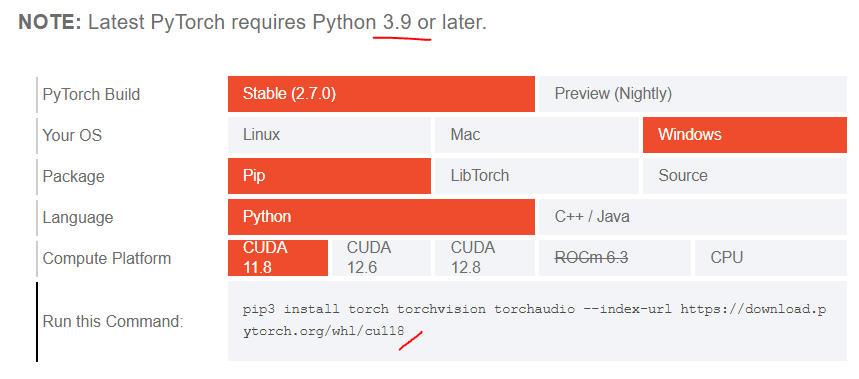
딥러닝라이브러리 버전과 호환될 수 있도록 쿠다버전을 맞게 설치해주는게 중요
<br><br>
- 인간 신경망을 본따 만든 인공신경망
    - 인간의 스냅스처럼 일정 신호의 정도에 미치지 못하면 잡음으로 무시.
- 인공신경망을 기반으로 만든게 LLM, 머신러닝(넘어서서 딥러닝)


In [1]:
#import 모음
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [4]:
data2= pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/Taitanic_train.csv")
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data= data2[['Survived', 'Pclass', 'Sex', 'Age','SibSp','Parch','Embarked']]

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [13]:
# 시리즈로 시리즈를 덮지 않도록 주의
data.loc[:,'Age']=data['Age'].fillna(data['Age'].mean())
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.000000,1,0,S,1
1,1,1,female,38.000000,1,0,C,1
2,1,3,female,26.000000,0,0,S,0
3,1,1,female,35.000000,1,0,S,1
4,0,3,male,35.000000,0,0,S,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S,0
887,1,1,female,19.000000,0,0,S,0
888,0,3,female,29.699118,1,2,S,3
889,1,1,male,26.000000,0,0,C,0


In [17]:
data.loc[:,'Family']=data['SibSp']+data['Parch']
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Family
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [14]:
data['Embarked'].mode()[0]

'S'

In [16]:
data.loc[:,'Embarked']= data['Embarked'].fillna(data['Embarked'].mode()[0])

In [18]:
data= data.drop(['SibSp', 'Parch'], axis=1)
data

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,male,22.000000,S,1
1,1,1,female,38.000000,C,1
2,1,3,female,26.000000,S,0
3,1,1,female,35.000000,S,1
4,0,3,male,35.000000,S,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,S,0
887,1,1,female,19.000000,S,0
888,0,3,female,29.699118,S,3
889,1,1,male,26.000000,C,0


In [22]:
data= pd.get_dummies(data, drop_first=True)
data

,Survived,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,True,False,True
1,1,1,38.000000,1,False,False,False
2,1,3,26.000000,0,False,False,True
3,1,1,35.000000,1,False,False,True
4,0,3,35.000000,0,True,False,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,True,False,True
887,1,1,19.000000,0,False,False,True
888,0,3,29.699118,3,False,False,True
889,1,1,26.000000,0,True,False,False


In [54]:
X = data.drop('Survived',axis=1)
y=data['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [55]:
#gpt가 준거
X_train, X_test, y_train, y_test = train_test_split(
    mms_X, y, test_size=0.3, random_state=42)


In [51]:
# 강사님표
X_train, X_test, y_train, y_test= train_test_split(
    mms_X,y, test_size=0.3, stratify=y, random_state=42)

**머신러닝이 잘됐다면 딥러닝도 쌉파서블**.
<br>

# 데이터의 스케일은 딥러닝에서도 맞춰줘야함.
- 주로사용하는 것: MinMaxScaler와 StandardScaler
- MinMaxScaler <- 이진분류(0,1)
- StandardScaler <- 연속값예측
- RobustScaler <- 이상값이 많은경우

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
mms= MinMaxScaler()
mms_X_train = mms.fit_transform(X_train)
mms_X_test = mms.transform(X_test)
mms_X_train = pd.DataFrame(mms_X_train, columns=X_train.columns, index=X_train.index)
mms_X_test = pd.DataFrame(mms_X_test, columns=X_test.columns, index=X_test.index)
display(mms_X_train)
display(mms_X_test)

,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
445,0.0,0.044986,0.2,1.0,0.0,1.0
650,1.0,0.367921,0.0,1.0,0.0,1.0
172,1.0,0.007288,0.2,0.0,0.0,1.0
450,0.5,0.447097,0.3,1.0,0.0,1.0
314,0.5,0.535059,0.2,1.0,0.0,1.0
...,...,...,...,...,...,...
106,1.0,0.258608,0.0,0.0,0.0,1.0
270,0.0,0.367921,0.0,1.0,0.0,1.0
860,1.0,0.509927,0.2,1.0,0.0,1.0
435,0.0,0.170646,0.3,0.0,0.0,1.0


,Pclass,Age,Family,Sex_male,Embarked_Q,Embarked_S
709,1.0,0.367921,0.2,1.0,0.0,0.0
439,0.5,0.384267,0.0,1.0,0.0,1.0
840,1.0,0.246042,0.0,1.0,0.0,1.0
720,0.5,0.070118,0.1,0.0,0.0,1.0
39,1.0,0.170646,0.1,0.0,0.0,0.0
...,...,...,...,...,...,...
821,1.0,0.334004,0.0,1.0,0.0,1.0
633,0.0,0.367921,0.0,1.0,0.0,1.0
456,0.0,0.811510,0.0,1.0,0.0,1.0
500,1.0,0.208344,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 이용한 순차적 모델생성
- 불러온 것들 중 Sequential
    - 인공신경망을 순차적으로 작성할때 쓰임
- Dense : 층(layers)을 만드는 함수

### 모델 생성 과정
1. 신경망 모델 정의
2. 신경망 모델 훈련
3. 테스트
4. 검증
- 머신러닝과 비슷하지만 차이점은 모델을 만들어진걸 갖다쓰지 않고 직접 짜야함.
- CNN이나 RNN은 짤때 원칙지켜야함

In [40]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


- 입력층은 반드시 독립변수의 수(input_dim)를 정확히 지정해야함.
- 신경망 모델의 은닉층은 2~3개가 적정선.
- Dense의 노드의 수는 2의 배수
    - 256 16 8 4 2 이런식으로 큰수에서 작은수로 줄여냐가야함.
- 은닉층의 활성화 함수: Relu (다른함수도 있지만 관행적)
- 출력층은 이진분류일 경우 sigmoid, 다중분류일 경우 softmax
- 회귀분석일 경우 = 종속변수(타겟)이 연속형(수치)인 경우
    노드1로 바로지정(활성함수X)
    

In [57]:
# 신경망 모델 정의
model = Sequential()                  # shape[1]을 통해 변수의 컬럼수
model.add(Input(shape=(mms_X_train.shape[1],)))
model.add(Dense(64, activation='relu')) # 이줄까지 입력층

model.add(Dense(32, activation='relu')) # 여기부터 은닉층
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층
# 이진분류이므로 sigmoid, 다중분류일 경우 softmax




# 모델의 파라미터 세팅 model.compile()
- loss: 오차 계산 지표
    - 이진분류: binary_crossentropy를 지정해줘야함
    - 다중분류: categorical_crossentropy
    - 데이터에 0이 많고1이 희소한 희소행렬인 경우:
        sparse_categorical_crossentropy
    - 연속형데이터(회귀분석):mse
- optimizer: learning_rate와 비슷
    - adam 사용이 일반적.
- metrics: (성능)평가지표 accuracy

In [58]:
# 모델의 파라미터 세팅                                      #metrics의 시그니처는 다양함
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# 만들어진 모델을 출력 - 시퀀셜모델이 이렇게 정의가 되었다~
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
len(mms_X_train)

623

# 모델 훈련 model.fit(X_train, y_train)
- epochs: 전체 데이터를 한 번 훈련하는 주기 10~100사이
- batch_size: 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 크기 조절해야 메모리 원활
    2의배수만 가능하므로 64, 32로 쪼개서 넣는것 추천.
- validation_data: 검증 데이터로 모델 검증 실시

In [70]:
# 
history = model.fit(mms_X_train, y_train, epochs=100, batch_size=16,
                   validation_data=(mms_X_test, y_test))

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8321 - loss: 0.3977 - val_accuracy: 0.8060 - val_loss: 0.4506
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8353 - loss: 0.3882 - val_accuracy: 0.7836 - val_loss: 0.4646
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8280 - loss: 0.4135 - val_accuracy: 0.7910 - val_loss: 0.4726
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8313 - loss: 0.4123 - val_accuracy: 0.7948 - val_loss: 0.4563
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8529 - loss: 0.3590 - val_accuracy: 0.7985 - val_loss: 0.4599
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8396 - loss: 0.4276 - val_accuracy: 0.7948 - val_loss: 0.4743
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8316 - loss: 0.3908 - val_accuracy: 0.8022 - val_loss: 0.4563
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8871 - loss: 0.3110 - val_accuracy: 0.7910 - 

In [46]:
# 값이 일치하는지 보기
print(mms_X_train.shape)  # 예: (623, 10)
print(y_train.shape)      # 예: (268,)


(623, 6)
(623,)


# 딥러닝 모델 성능 평가
- 딥러닝에서 모델의 성능을 평가하는 지표는 loss이고 accuracy가 아님
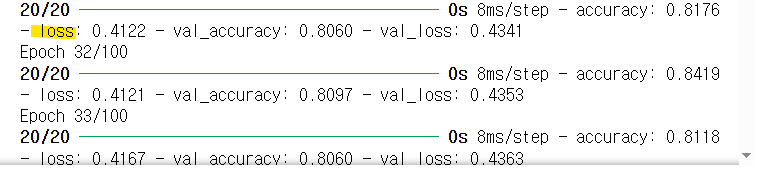
- loss와 accuray는 항상 비례하여 증가하지 않음
- val_accuracy와 val_loss가 차이난다면 loss가 낮을때 더 좋은 모델

- 가장 accuracy가 높은 Epoch가 저장되게 할 수 있음.
- 최적값은 accur이 가장 높고 loss가 가장 적은
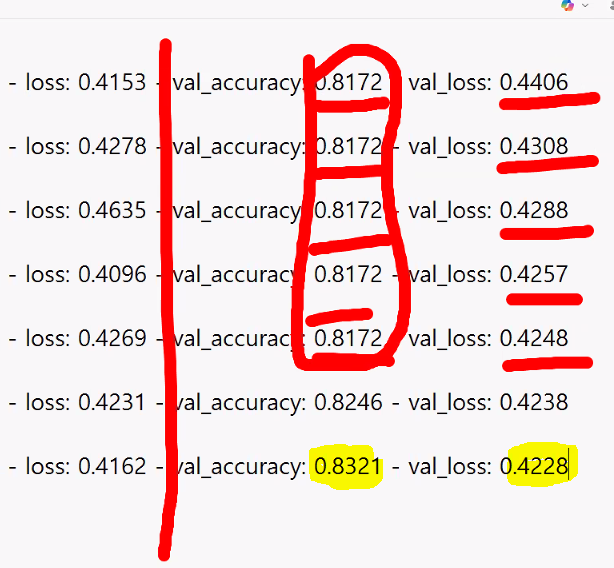

- 돌릴때마다 최적의 값은 계속 달라지므로 저장해놓고 쓴다
- batch size를 조정하면 훈련시간과 결과가 달라진다.

In [63]:
score = model.evaluate(mms_X_test, y_test)
print('test loss :', score[0])
print('test accuracy :', score[0])

# 결과에서 마지막Epoch의 accur과 loss를 보여줌

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7995 - loss: 0.4443
test loss : 0.46029677987098694
test accuracy : 0.46029677987098694


In [68]:
for i in history.history:
    print(i)

accuracy
loss
val_accuracy
val_loss


In [67]:
# 아까 만든 history 메서드를 이용해 loss들만 출력
history.history['loss']

[0.6554428339004517,
 0.6059472560882568,
 0.5601689219474792,
 0.5227051377296448,
 0.49620676040649414,
 0.47762322425842285,
 0.46642646193504333,
 0.4553270637989044,
 0.4480963945388794,
 0.4404118061065674,
 0.441091924905777,
 0.4324970841407776,
 0.4308807849884033,
 0.42787137627601624,
 0.4265689253807068,
 0.42413952946662903,
 0.42060431838035583,
 0.4201669991016388,
 0.41757261753082275,
 0.41593390703201294,
 0.41624966263771057,
 0.41505786776542664,
 0.4148261845111847,
 0.4120466709136963,
 0.4115924835205078,
 0.40985551476478577,
 0.41004252433776855,
 0.4116170406341553,
 0.41043615341186523,
 0.4082714319229126,
 0.40510332584381104,
 0.40355929732322693,
 0.4055643081665039,
 0.4030384123325348,
 0.4009826183319092,
 0.4047728478908539,
 0.40153399109840393,
 0.4069507420063019,
 0.39960336685180664,
 0.3996928632259369,
 0.3987593948841095,
 0.3994429409503937,
 0.39561137557029724,
 0.39523473381996155,
 0.39770445227622986,
 0.3949281871318817,
 0.394226908683

# 훈련 결과 시각화하기 history.history['loss'], history.history['val_loss']

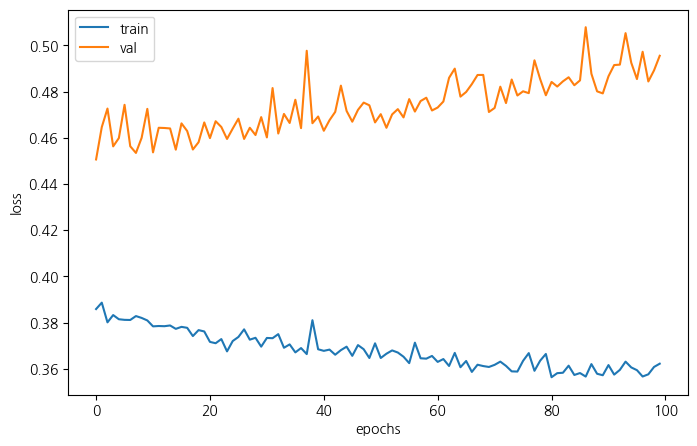

In [84]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


val(발리데이션?) accur 와 loss는 주어진 데이터 말고 새로운 데이터를 받았을때 어떻게 될지에 대한 부분이므로 그래프에서 두개의 간격이 좁을 수록 
훈련데이터에 과적합되서 테스트데이터를 잘 맞추지 못했다는 뜻. 테스트결과가 좋아야 정확하고 좋은 모델인것.

# 예측값 출력
예측 확률로나옴.

In [71]:
pred = model.predict(mms_X_test)
pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[5.75851910e-02],
       [1.09887920e-01],
       [1.32510006e-01],
       [9.61886048e-01],
       [5.45669556e-01],
       [9.95619476e-01],
       [7.85342455e-01],
       [1.86074793e-01],
       [7.07328022e-01],
       [9.39397275e-01],
       [3.57462466e-01],
       [1.00595221e-01],
       [1.27438426e-01],
       [1.61321789e-01],
       [1.07092798e-01],
       [9.85257983e-01],
       [2.73223400e-01],
       [7.85342455e-01],
       [1.11831218e-01],
       [2.65438437e-01],
       [1.25952795e-01],
       [2.39134371e-01],
       [4.43605334e-01],
       [1.32510006e-01],
       [1.20585300e-01],
       [3.85919437e-02],
       [4.05053198e-01],
       [1.09887920e-01],
       [1.78851530e-01],
       [4.25143600e-01],
       [1.35465086e-01],
       [4.24971968e-01],
       [3.60272825e-01],
       [4.24735069e-01],
       [1.39946327e-01],
       [2.02706486e-01],
       [2.32165769e-01],
       [7.85342455e-01],
       [9.82117236e-01],
       [1.20585300e-01],


In [73]:
pred[:,0]

array([5.75851910e-02, 1.09887920e-01, 1.32510006e-01, 9.61886048e-01,
       5.45669556e-01, 9.95619476e-01, 7.85342455e-01, 1.86074793e-01,
       7.07328022e-01, 9.39397275e-01, 3.57462466e-01, 1.00595221e-01,
       1.27438426e-01, 1.61321789e-01, 1.07092798e-01, 9.85257983e-01,
       2.73223400e-01, 7.85342455e-01, 1.11831218e-01, 2.65438437e-01,
       1.25952795e-01, 2.39134371e-01, 4.43605334e-01, 1.32510006e-01,
       1.20585300e-01, 3.85919437e-02, 4.05053198e-01, 1.09887920e-01,
       1.78851530e-01, 4.25143600e-01, 1.35465086e-01, 4.24971968e-01,
       3.60272825e-01, 4.24735069e-01, 1.39946327e-01, 2.02706486e-01,
       2.32165769e-01, 7.85342455e-01, 9.82117236e-01, 1.20585300e-01,
       1.00751154e-01, 1.07549123e-01, 1.20585300e-01, 1.06835194e-01,
       6.24103785e-01, 1.39827300e-02, 1.35465086e-01, 1.27260551e-01,
       1.25952795e-01, 8.60466182e-01, 9.96700943e-01, 9.98237252e-01,
       8.20045418e-04, 7.46425986e-01, 5.86159527e-02, 9.33981478e-01,
      

In [74]:
result= pd.DataFrame(dict(y_test=y_test, pred=pred[:,0]))
result

,y_test,pred
709,1,0.057585
439,0,0.109888
840,0,0.132510
720,1,0.961886
39,1,0.545670
...,...,...
821,1,0.123142
633,0,0.234851
456,0,0.351659
500,0,0.150047


In [76]:
result['pred']=result['pred'].apply(lambda x: 1 if x>= 0.5 else 0)
result

,y_test,pred
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [77]:
from sklearn.metrics import classification_report
print(classification_report(result['y_test'], result['pred']))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.80      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [78]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dtc= DecisionTreeClassifier(max_depth=i, random_state=42)
dtc.fit(mms_X_train,y_train)
pred2= dtc.predict(mms_X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.51      0.65       111

    accuracy                           0.77       268
   macro avg       0.81      0.73      0.74       268
weighted avg       0.80      0.77      0.76       268

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

              preci

In [83]:
for i in range(1,11):
    dtc= DecisionTreeClassifier(max_depth=i, random_state=42)
    dtc.fit(mms_X_train,y_train)
    pred2= dtc.predict(mms_X_test)
    print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

              precision    recall  f1-score   support

           0       0.74      0.96      0.83       157
           1       0.89      0.51      0.65       111

    accuracy                           0.77       268
   macro avg       0.81      0.73      0.74       268
weighted avg       0.80      0.77      0.76       268

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.71      0.76       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268

              preci

# Functional API를 이용한 함수형 모델
- Sequential Api는 단순히 층을 여러개 쌓는 형태로 복잡한 모델 생성에 한계가 있음.
- Functional API는 입출력층을 사용자가 직접 정의가능.
- 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의할 수 있음.
- Input(shape=(독립변수 수))로 입력층 정의
- 이전 층을 다음 층의 입력으로
- model()에 입력과 출력을 정의

In [85]:
# 
from keras.layers import Input, Dense
from keras.models import Model

In [88]:
# 입력층
inputs = Input(shape=(mms_X_train.shape[1],))

# 은닉층
x = Dense(64, activation='relu')(inputs) # 함수형으로 되어있는 부분
x = Dense(32, activation='relu')(x)      # 계속 x를 재할당해줌
x = Dense(16, activation='relu')(x)

# 출력층
outputs = Dense(1, activation='sigmoid')(x)

# 모델정의
model = Model(inputs=inputs, outputs=outputs )
model.summary()


# 클래스형은 생성자가 필요해서 생성자내용 추가된다는점 제외하면 함수형과 동일


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(mms_X_train, y_train, 
                    epochs=100, batch_size=32, 
                    validation_data=(mms_X_test, y_test))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8647 - loss: 0.3627 - val_accuracy: 0.7985 - val_loss: 0.4445
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8511 - loss: 0.3664 - val_accuracy: 0.7910 - val_loss: 0.4448
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8684 - loss: 0.3468 - val_accuracy: 0.7948 - val_loss: 0.4451
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8484 - loss: 0.3488 - val_accuracy: 0.7910 - val_loss: 0.4450
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8424 - loss: 0.3935 - val_accuracy: 0.7948 - val_loss: 0.4465
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8181 - loss: 0.4106 - val_accuracy: 0.7910 - val_loss: 0.4465
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8358 - loss: 0.3984 - val_accuracy: 0.7985 - val_loss: 0.4474
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8538 - loss: 0.3569 - val_accuracy: 0.7910

In [96]:
# 하는김에 클래식리포트까지
pred3 = model.predict(mms_X_test)
pred3 = pd.DataFrame(pred3)
pred3 = pred3[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred3))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.80      0.66      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



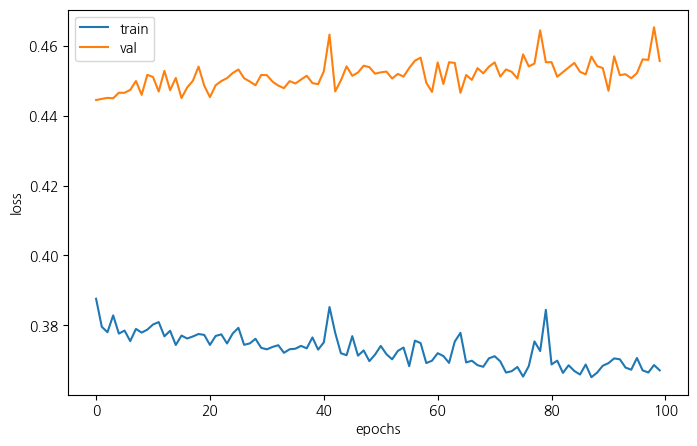

In [97]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


# class 형으로 만들기 (Model Subclass API)
- class 형태의 모델 정의 방법
- keras의 모델을 상속받아서 작성

In [102]:
# layer 정의하는 단계
class Titanic(Model):
    def __init__(self):
        super(Titanic, self).__init__()
        self.dense1 = Dense(128, activation='relu')
        self.dense2 = Dense(64, activation='relu')
        self.dense3 = Dense(32, activation='relu')
        self.dense4 = Dense(16, activation='relu')
        self. classifier = Dense(1, activation='sigmoid')
#         
    def call(self, inputs):
        x=self.dense1(inputs)
        x=self.dense2(x)
        x=self.dense3(x)
        x=self.dense4(x)
        return self.classifier(x)
        

In [103]:
model = Titanic()
print(model.summary())

Model: "titanic_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [106]:
# 훈련하는 코드
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(mms_X_train, y_train, epochs=100, 
                  batch_size=32, validation_data=(mms_X_test,y_test))

# 마지막에 Epoch이 가장 좋은게 아닌 점

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6388 - loss: 0.6283 - val_accuracy: 0.5858 - val_loss: 0.5783
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6916 - loss: 0.5508 - val_accuracy: 0.7649 - val_loss: 0.5480
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7903 - loss: 0.5244 - val_accuracy: 0.8022 - val_loss: 0.5394
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8254 - loss: 0.4991 - val_accuracy: 0.7948 - val_loss: 0.5255
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8111 - loss: 0.5108 - val_accuracy: 0.8097 - val_loss: 0.5054
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7959 - loss: 0.5105 - val_accuracy: 0.8022 - val_loss: 0.4901
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7846 - loss: 0.5010 - val_accuracy: 0.8022 - val_loss: 0.4714
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8266 - loss: 0.4238 - val_accuracy: 0.

In [109]:
print(model.summary())

Model: "titanic_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


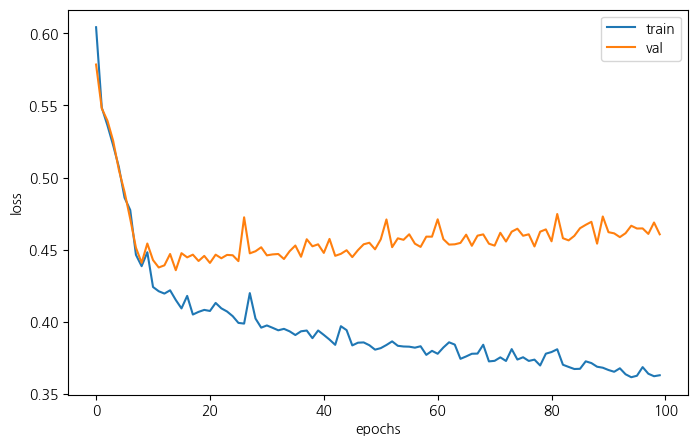

In [108]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()


# 다중분류